<a href="https://colab.research.google.com/github/bl3z3/master_thesis_resources/blob/master/MIIP_Thesis_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import numpy as np
 import plotly
 import plotly.offline as py
 from IPython.display import Image, HTML

In [36]:
df = pd.read_csv("data.csv")

In [37]:
df.columns

Index(['CellID', 'Operation Type', 'OperationID', 'ProcessID', 'FailureID',
       'Feature translated', 'Operator Number', 'Features', 'TraceabilityCode',
       'Shift'],
      dtype='object')

Rename columns

In [38]:
df.rename(columns={'Operation Type': 'OperationType', 'Feature translated': 'Feature', 'Operator Number': 'Operator'}, inplace=True)

In [39]:
df.shape

(27014, 10)

In [40]:
df.corr()

,CellID,OperationID,ProcessID,FailureID,Operator,Features,TraceabilityCode
CellID,1.000000,0.995180,0.030590,-0.006297,-0.059196,-0.463435,0.034263
OperationID,0.995180,1.000000,0.030605,-0.006513,-0.059659,-0.491265,0.034686
ProcessID,0.030590,0.030605,1.000000,0.947687,-0.064801,-0.137529,0.992767
FailureID,-0.006297,-0.006513,0.947687,1.000000,-0.056081,-0.111690,0.917668
Operator,-0.059196,-0.059659,-0.064801,-0.056081,1.000000,0.013552,-0.062933
Features,-0.463435,-0.491265,-0.137529,-0.111690,0.013552,1.000000,-0.140046
TraceabilityCode,0.034263,0.034686,0.992767,0.917668,-0.062933,-0.140046,1.000000


In [41]:
df.isna().sum()

CellID                  0
OperationType           0
OperationID             0
ProcessID               0
FailureID               0
Feature             25044
Operator            24102
Features                0
TraceabilityCode        0
Shift                   0
dtype: int64

In [42]:
df["Feature"].value_counts(normalize=True) * 100

UNSTABLE                                  51.218274
POROSITY                                  20.304569
BURN THROUGH                              11.472081
OFF SEAM                                   5.329949
UNDERCUT                                   4.619289
SHORT OR LONG LENGTH                       3.197970
REWELDED BY ROBOT                          1.827411
DEFORMED OR BADLY POSITIONED COMPONENT     1.015228
CRACK                                      0.761421
NOTCH                                      0.152284
MISSING COMPONENT                          0.101523
Name: Feature, dtype: float64

In [43]:
df["Operator"].value_counts(normalize=True) * 100

83757.0    16.277473
84562.0    13.186813
84460.0    12.053571
83634.0    11.984890
83553.0    11.950549
84947.0     9.958791
84081.0     6.662088
84842.0     4.189560
84073.0     3.468407
83481.0     2.472527
84960.0     2.060440
85166.0     1.820055
83758.0     1.545330
85024.0     0.789835
84901.0     0.480769
83651.0     0.446429
83339.0     0.274725
83793.0     0.240385
84797.0     0.068681
84079.0     0.034341
84620.0     0.034341
Name: Operator, dtype: float64

In [44]:
df["Shift"].value_counts(normalize=True) * 100

B    74.106019
A    15.913971
C     9.980010
Name: Shift, dtype: float64

Now we drop all columns with null value

In [45]:
df = df.dropna(how='any',axis=0) 

Check if the columns have been dropped successfully

In [46]:
df.isna().sum()

CellID              0
OperationType       0
OperationID         0
ProcessID           0
FailureID           0
Feature             0
Operator            0
Features            0
TraceabilityCode    0
Shift               0
dtype: int64

Data exploration

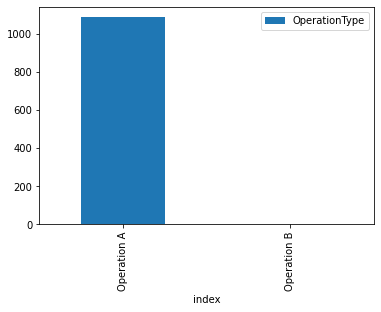

In [47]:
op_df = pd.DataFrame(df['OperationType'].value_counts()).reset_index()
op_df.plot(kind='bar',x='index',y='OperationType')
plt.show()

In [48]:
opTypeRanking = {'Operation A': 1, 'Operation B': 2}
df.OperationType = df.OperationType.map(opTypeRanking)
df.OperationType.head()

0    1
2    1
3    1
4    1
5    1
Name: OperationType, dtype: int64

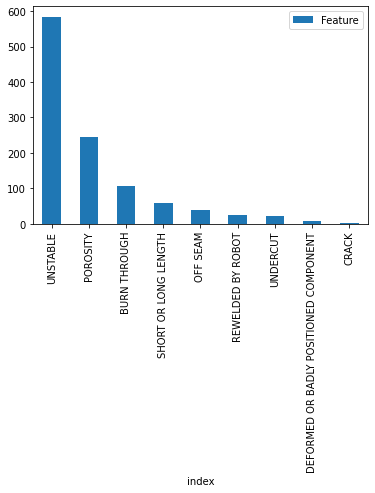

In [49]:
feature_df = pd.DataFrame(df['Feature'].value_counts()).reset_index()
feature_df.plot(kind='bar',x='index',y='Feature')
plt.show()

In [50]:
defectTypeRanking = {
    "UNSTABLE": 1,
    "UNDERCUT": 2,
    "SHORT OR LONG LENGTH": 3,
    "REWELDED BY ROBOT": 4,
    "POROSITY": 5,
    "OFF SEAM": 6,
    "NOTCH": 7,
    "MISSING COMPONENT": 8,
    "DEFORMED OR BADLY POSITIONED COMPONENT": 9,
    "CRACK": 10,
    "BURN THROUGH": 11
    }
df.Feature = df.Feature.map(defectTypeRanking)
df.Feature.head(10)

0     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
15    1
16    1
Name: Feature, dtype: int64

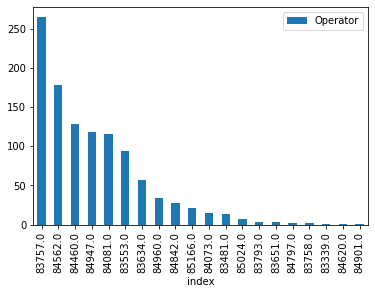

In [51]:
operator_df = pd.DataFrame(df['Operator'].value_counts()).reset_index()
operator_df.plot(kind='bar',x='index',y='Operator')
plt.show()

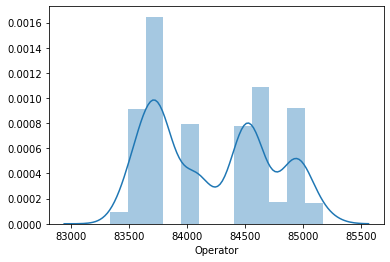

In [52]:
import seaborn as sns
sns.distplot(df['Operator'].fillna(df['Operator'].median()))

Shift distribution of data

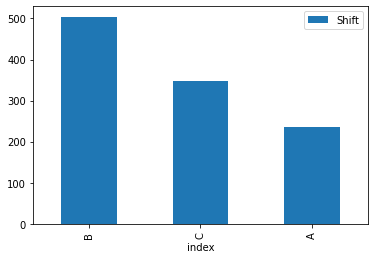

In [53]:
operator_df = pd.DataFrame(df['Shift'].value_counts()).reset_index()
operator_df.plot(kind='bar',x='index',y='Shift')
plt.show()

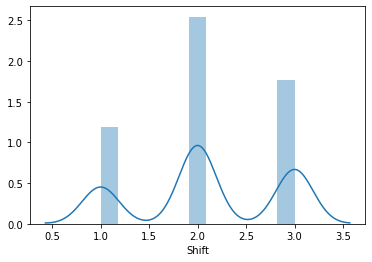

In [54]:
import seaborn as sns
shift_mapping = {"A": 1, "B": 2, "C": 3}
df.Shift = df.Shift.map(shift_mapping)
sns.distplot(df['Shift'].fillna(df['Shift'].median()))

Correlation search

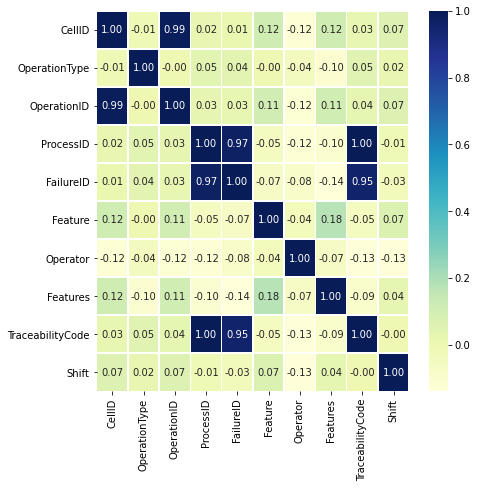

In [55]:
%matplotlib inline

f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

In [56]:
df.dtypes

CellID                int64
OperationType         int64
OperationID           int64
ProcessID             int64
FailureID             int64
Feature               int64
Operator            float64
Features              int64
TraceabilityCode      int64
Shift                 int64
dtype: object

In [57]:
df.sum().isna()

CellID              False
OperationType       False
OperationID         False
ProcessID           False
FailureID           False
Feature             False
Operator            False
Features            False
TraceabilityCode    False
Shift               False
dtype: bool

Linear regression modelling

In [106]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train, test, obj_train, obj_test = train_test_split(df.copy(), df.Feature, random_state=0)

train.shape, test.shape

((816, 10), (273, 10))

In [123]:
features = ['CellID', 'OperationType', 'OperationID', 'ProcessID', 'FailureID',
       'Feature', 'Operator', 'Features', 'TraceabilityCode',
       'Shift']
target = ['Feature']
model = LinearRegression()
model.fit(train[features],train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluation

In [124]:
target_pred_multiple = model.predict(test)
# sample predictions
print(target_pred_multiple[0:10])

[[ 5.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 1.]
 [11.]]


In [125]:
model.coef_


array([[ 7.07857447e-15, -4.59788457e-15, -1.56610293e-15,
        -8.67361738e-19,  6.31547765e-18,  1.00000000e+00,
         7.30481214e-17,  6.72650039e-17,  7.04731412e-18,
        -1.75292449e-16]])

In [126]:
print("\n\n"+'Intersecting value: ' + str(model.intercept_))



Intersecting value: [3.58113539e-12]


In [127]:
print('Model precision:')
model.score(train, obj_train)

Model precision:


1.0